<a href="https://colab.research.google.com/github/NadeemMughal/Langgraph/blob/main/Langgraph_ChatBot_qualify_and_book_According_to_availed_services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langchain langchain_core langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: langchain_core
    Found existing installation: langchain-core 0.3.29
    Uninstalling langchain-core-0.3.29:
      Successfully uninstalled langchain-core-0.3.29
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.14
    Uninstalling langchain-0.3.14:
      Successfully uninstalled langchain-0.3.14


In [2]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [4]:
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.2 MB/s eta 0:00:00


In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash-exp', api_key= GEMINI_API_KEY, max_output_tokens=1024)
llm

ChatGoogleGenerativeAI(model='models/gemini-2.0-flash-exp', google_api_key=SecretStr('**********'), max_output_tokens=1024, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7b91744baf50>, default_metadata=())

In [7]:
from langgraph.graph import START,END,StateGraph,MessagesState
from langgraph.prebuilt import ToolNode

In [8]:
class State(MessagesState):
  pass

In [31]:
# Tools
from langchain_core.tools import tool

@tool
# Service Type for Stylist and Dentist
def get_service_details(category, service_type):
    """
    Fetches service details based on category and service type.

    Args:
        category (str): The category ('stylist' or 'dentist').
        service_type (str): The specific service type within the category.

    Returns:
        str: Service details including price and time, or an error message if invalid.
    """
    stylist_services = {
        "haircut": {"price": 10, "time": 20},
        "beard trim": {"price": 15, "time": 25},
        "facial": {"price": 20, "time": 30},
    }

    dentist_services = {
        "root canal": {"price": 10, "time": 20},
        "teeth cleaning": {"price": 15, "time": 25},
        "teeth scaling": {"price": 20, "time": 30},
    }

    services = {
        "stylist": stylist_services,
        "dentist": dentist_services,
    }

    if category in services:
        service_details = services[category].get(service_type)
        if service_details:
            return f"The price for {service_type} is ${service_details['price']} and it takes {service_details['time']} minutes."
        else:
            return "Invalid service type."
    else:
        return "Invalid category. Please choose 'stylist' or 'dentist'."


@tool
def book_appointment(time):
    """
    Confirms an appointment booking for the given time.

    Args:
        time (str): The time for the appointment (e.g., '2:00 PM').

    Returns:
        str: Confirmation message for the appointment.
    """
    return f"Your appointment has been booked for {time}."


In [66]:
from typing import Optional, Literal
from langchain_core.tools import tool

#
# # Service Type for Stylist and Dentist
# def get_service_details(category: Literal["stylist", "dentist"], service_type: str) -> str:  # Added type hints
#     """
#     Fetches service details based on category and service type.

#     Args:
#         category (str): The category ('stylist' or 'dentist').
#         service_type (str): The specific service type within the category.

#     Returns:
#         str: Service details including price and time, or an error message if invalid.
#     """
#     stylist_services = {
#         "haircut": {"price": 10, "time": 20},
#         "beard trim": {"price": 15, "time": 25},
#         "facial": {"price": 20, "time": 30},
#     }

#     dentist_services = {
#         "root canal": {"price": 10, "time": 20},
#         "teeth cleaning": {"price": 15, "time": 25},
#         "teeth scaling": {"price": 20, "time": 30},
#     }

#     services = {
#         "stylist": stylist_services,
#         "dentist": dentist_services,
#     }

#     if category in services:
#         service_details = services[category].get(service_type)
#         if service_details:
#             return f"The price for {service_type} is ${service_details['price']} and it takes {service_details['time']} minutes."
#         else:
#             return "Invalid service type."
#     else:
#         return "Invalid category. Please choose 'stylist' or 'dentist'."

#
# def get_stylist_service_details(service_type: str) -> str:
#     """
#     Fetches service details for stylist services.

#     Args:
#         service_type (str): The specific service type within the stylist category.

#     Returns:
#         str: Service details including price and time, or an error message if invalid.
#     """
#     stylist_services = {
#         "haircut": {"price": 10, "time": 20},
#         "beard trim": {"price": 15, "time": 25},
#         "facial": {"price": 20, "time": 30},
#     }

#     service_details = stylist_services.get(service_type)
#     if service_details:
#         return f"The price for {service_type} is ${service_details['price']} and it takes {service_details['time']} minutes."
#     else:
#         return "Invalid stylist service type."
#
# def get_dentist_service_details(service_type: str) -> str:
#     """
#     Fetches service details for dentist services.

#     Args:
#         service_type (str): The specific service type within the dentist category.

#     Returns:
#         str: Service details including price and time, or an error message if invalid.
#     """
#     dentist_services = {
#         "root canal": {"price": 10, "time": 20},
#         "teeth cleaning": {"price": 15, "time": 25},
#         "teeth scaling": {"price": 20, "time": 30},
#     }

#     service_details = dentist_services.get(service_type)
#     if service_details:
#         return f"The price for {service_type} is ${service_details['price']} and it takes {service_details['time']} minutes."
#     else:
#         return "Invalid dentist service type."

@tool
def get_stylist_service_details(service_type: str) -> str:
    """
    Fetches service details for stylist services.

    Args:
        service_type (str): The specific service type within the stylist category.
                            Valid options include:
                            - "haircut": Basic haircut service.
                            - "beard trim": Beard trimming service.
                            - "facial": Facial skincare service.

    Returns:
        str: A user-friendly message with the price and time for the selected stylist service.
             For example:
             - "The price for haircut is $10 and it takes 20 minutes."
             - "Invalid stylist service type." (if the service type is invalid).
    """
    stylist_services = {
        "haircut": {"price": 10, "time": 20},
        "beard trim": {"price": 15, "time": 25},
        "facial": {"price": 20, "time": 30},
    }
    service_details = stylist_services.get(service_type)
    if service_details:
        return f"The price for {service_type} is ${service_details['price']} and it takes {service_details['time']} minutes."
    else:
        return "Invalid stylist service type."


@tool
def get_dentist_service_details(service_type: str) -> str:
    """
    Fetches service details for dentist services.

    Args:
        service_type (str): The specific service type within the dentist category.
                            Valid options include:
                            - "root canal": Root canal treatment service.
                            - "teeth cleaning": Dental cleaning service.
                            - "teeth scaling": Dental scaling service.

    Returns:
        str: A user-friendly message with the price and time for the selected dentist service.
             For example:
             - "The price for teeth cleaning is $15 and it takes 25 minutes."
             - "Invalid dentist service type." (if the service type is invalid).
    """
    dentist_services = {
        "root canal": {"price": 10, "time": 20},
        "teeth cleaning": {"price": 15, "time": 25},
        "teeth scaling": {"price": 20, "time": 30},
    }
    service_details = dentist_services.get(service_type)
    if service_details:
        return f"The price for {service_type} is ${service_details['price']} and it takes {service_details['time']} minutes."
    else:
        return "Invalid dentist service type."


@tool
def book_appointment(time: str) -> str:  # Added type hints
    """
    Confirms an appointment booking for the given time.

    Args:
        time (str): The time for the appointment (e.g., '2:00 PM').

    Returns:
        str: Confirmation message for the appointment.
    """
    return f"Your appointment has been booked for {time}."

In [67]:
tools = [get_stylist_service_details, get_dentist_service_details, book_appointment]
llm_with_tools  = llm.bind_tools(tools)

In [57]:
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, AIMessage
sys_msg = SystemMessage(content= f"""You are a professional service provider bot that assists users in selecting and booking appointments for stylist and dentist services. Your tasks include:

###Providing Service Details:

Fetch and present service details (price and time required) for the selected category (stylist or dentist) and service type.
Ensure accurate and user-friendly explanations.
###Booking Appointments:

Confirm appointments for the user at their specified time.
Provide a clear and polite confirmation message.
##Interaction Flow:
Introduction: Welcome the user, explaining your capabilities for managing stylist and dentist services.
Service Details: Ask the user to select a category and service type, then provide the relevant details.
Appointment Booking: If the user wishes to proceed, confirm their preferred time and finalize the booking.
##Error Handling:
Respond with clear error messages for invalid inputs, such as:
"Invalid category. Please choose 'stylist' or 'dentist'."
"Invalid service type. Please provide a valid service."
##Example Interaction:
User: I need a haircut.
Bot: Sure! The price for a haircut is $10, and it takes 20 minutes. When would you like to book your appointment?

User: 4:00 PM tomorrow.
Bot: Your appointment has been successfully booked for 4:00 PM tomorrow. Thank you!""")

In [68]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


# Build Grafrom langgraph.prebuilt import tools_conditionph
builder: StateGraph = StateGraph(state_schema=MessagesState)
builder.add_node("LLM_withTools", llm_with_tools)
builder.add_node("tools", ToolNode(tools))



In [69]:
builder.add_edge(START, "LLM_withTools")
builder.add_conditional_edges("LLM_withTools", tools_condition)
builder.add_edge("tools","LLM_withTools")
#builder.add_edge("tools", END)
from langgraph.graph.state import CompiledStateGraph
graph: CompiledStateGraph = builder.compile()

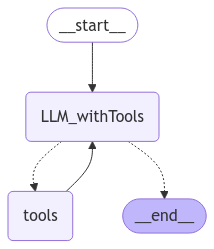

In [70]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [63]:
from langchain_core.messages import AIMessage, HumanMessage

# Initialize the chatbot state
state = State(messages=[])

# Function to invoke tools and return a response through LLM
def chatbot(state: State) -> State:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    # Invoke the LLM with the current state
    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])

    # Check if a tool was called
    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        # Parse tool call details
        tool_name = tool_calls["name"]
        tool_args = tool_calls["arguments"]
        tool_args = eval(tool_args)  # Convert arguments from JSON string to dictionary

        # Execute the tool
        tool_result = None
        for tool in tools:
            if tool.name == tool_name:
                tool_result = tool.func(**tool_args)
                break

        # Create a message with the tool result and reinvoke the LLM
        tool_result_message = HumanMessage(
            content=f"The tool '{tool_name}' calculated the result: {tool_result}. "
                    f"Please craft a natural language response for the user."
        )
        final_response = llm_with_tools.invoke([sys_msg] + state['messages'] + [tool_result_message])

        # Append the final response to the state
        state['messages'].append(final_response)
    else:
        # If no tool was called, append the original response
        state['messages'].append(llm_response)

    return state
# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: hi
Chatbot: Hello! I'm here to help you with booking stylist and dentist appointments. Would you like to know more about our services?
You: yes.
Chatbot: Great! To get started, please specify whether you're interested in 'stylist' or 'dentist' services.
You: i want to do a haircut
Chatbot: Sure! The price for a haircut is $10, and it takes 20 minutes. When would you like to book your appointment?
You: i also want to do a teeth cleaning,
Chatbot: Okay, the price for teeth cleaning is $50, and it takes 30 minutes. Would you like to book both appointments? And if so, what time would you like to book them?
You: what;s the price of root canal?
Chatbot: The price for a root canal is $10, and it takes 20 minutes.
You: and whats the price from teeth cleaning from your docs.
Chatbot: Okay, the price for teeth cleaning with our dentists is $15, and it takes 25 minutes.
You: OK, I need both,
Chatbot: Great! So you'd like to book a root canal and teeth c

## Second

In [73]:
sys_msg = SystemMessage(content="""You are a professional service provider bot that assists users in selecting and booking appointments for stylist and dentist services.

### Guidelines:
1. **Service Details**:
   Always use the provided tools to fetch accurate details (price and time) for the service type. Avoid guessing or generating details yourself.
2. **Appointment Booking**:
   To book an appointment, ask the user for their preferred time and confirm it using the `book_appointment` tool.
3. **Error Handling**:
   If a tool cannot process the input, provide the user with clear guidance on what to do next. Examples:
   - "Invalid category. Please choose 'stylist' or 'dentist'."
   - "Invalid service type. Please provide a valid service."

### Interaction Flow:
1. Welcome the user and guide them to specify a service type.
2. Fetch service details using the correct tool and provide them to the user.
3. Confirm booking details using the `book_appointment` tool and finalize the booking.
4. Always ensure clarity and user-friendliness in your responses.
""")


In [76]:
def chatbot(state: State) -> State:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])

    # Check if the LLM called a tool
    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        tool_name = tool_calls["name"]
        tool_args = eval(tool_calls["arguments"])  # Convert arguments from JSON string to dictionary

        # Find and invoke the correct tool
        tool_result = None
        for tool in tools:
            if tool.name == tool_name:
                try:
                    tool_result = tool.func(**tool_args)
                except Exception as e:
                    tool_result = f"Error invoking tool: {e}"
                break

        # Append tool result to the state
        tool_result_message = HumanMessage(content=tool_result)
        state['messages'].append(tool_result_message)

        # Re-invoke the LLM with tool result
        final_response = llm_with_tools.invoke([sys_msg] + state['messages'])
        state['messages'].append(final_response)
    else:
        # Append the LLM response directly
        state['messages'].append(llm_response)

    return state


# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: hi,
Chatbot: Hello! I'm here to help you with booking stylist and dentist appointments. Would you like to know more about our services?
You: yes.
Chatbot: Great! To get started, please specify whether you're interested in 'stylist' or 'dentist' services.
You: I need a haircut.
Chatbot: Okay, the price for a haircut is $10, and it takes 20 minutes. Would you like to book an appointment? If so, what time would you like to book it for?
You: I also need a haircut.
Chatbot: Okay, it seems like you want to book two haircuts. Is that correct? And if so, what time would you like to book them for?
You: no need 1 haircut.
Chatbot: Okay, just one haircut then. What time would you like to book it for?
You: i also need teeth cleaning.
Chatbot: Okay, the price for teeth cleaning is $15, and it takes 25 minutes. Would you like to book both appointments? And if so, what time would you like to book them?
You: how much total time i need to avail these services

In [ ]:
hi